In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# make paths and read csv raw data
data_path = "Resources/imdb.csv"

data = pd.read_csv(data_path)

In [3]:
data.head()

,Unnamed: 0,title,year,kind,genre,rating,vote,country,language,runtime,cast,director,composer,writer,runtimes
0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",7.7,474.0,['United States'],['English'],['50'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",NaN
1,1,Character,2021.0,movie,"['Crime', 'Horror', 'Thriller']",8.3,46.0,['Japan'],['Japanese'],['125'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],['Youki Kojima'],"['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...",NaN
2,2,Get Up and Dance!,1994.0,video movie,['Family'],8.1,18.0,['United States'],['English'],['54'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,NaN
3,3,The Rise and Fall of El Chapo,2016.0,tv movie,['Documentary'],6.9,42.0,['United States'],NaN,['85'],NaN,NaN,NaN,NaN,NaN
4,4,Sick - IMDb,NaN,NaN,['Thriller'],NaN,NaN,['United States'],NaN,NaN,"['Marc Menchaca', 'Gideon Adlon', 'Dylan Spray...",['John Hyams'],NaN,"['Katelyn Crabb', 'Kevin Williamson']",NaN


In [4]:
#get needed columns
year_data_df = data[['title','year','rating','vote']]

year_data_df.head()

,title,year,rating,vote
0,Dinosaur Planet,2003.0,7.7,474.0
1,Character,2021.0,8.3,46.0
2,Get Up and Dance!,1994.0,8.1,18.0
3,The Rise and Fall of El Chapo,2016.0,6.9,42.0
4,Sick - IMDb,NaN,NaN,NaN


In [1]:
#drop and null values
year_data_df = year_data_df.dropna()


year_data_df.head(20)

NameError: name 'year_data_df' is not defined

In [6]:
# dropping ALL duplicate values
year_data_df.drop_duplicates(subset ="title", keep = 'first', inplace = True)

In [7]:
#check for earliest date
earliestyear = year_data_df['year'].min()
earliestyear

1914.0

In [8]:
#create the bins to separate the age group and label the bins
bins = [0, 1939.9, 1949.9, 1959.9, 1969.9, 1979.9, 1989.9, 1999.9, 2009.9, 2019.9, 3000]
bin_names = ["Before 1940", "1940-1950", "1950-1960", "1960-1970", "1970-1980", "1980-1990", "1990-2000", "2000-2010", "2010-2020", "Post 2020"]

In [9]:
#add column to dataframe that describes that shows bins
year_data_df["Year Group"] = pd.cut(year_data_df["year"], bins, labels=bin_names, include_lowest=True)
year_data_df.head(20)

,title,year,rating,vote,Year Group
0,Dinosaur Planet,2003.0,7.7,474.0,2000-2010
1,Character,2021.0,8.3,46.0,Post 2020
2,Get Up and Dance!,1994.0,8.1,18.0,1990-2000
3,The Rise and Fall of El Chapo,2016.0,6.9,42.0,2010-2020
5,8 Man,1992.0,5.5,93.0,1990-2000
6,What the #$*! Do We (K)now!?,2004.0,5.3,13432.0,2000-2010
7,Class of Nuke 'Em High Part II: Subhumanoid Me...,1991.0,4.5,2177.0,1990-2000
8,The Fighter,2010.0,7.8,351199.0,2010-2020
11,Neil Diamond: Greatest Hits Live,1988.0,8.0,81.0,1980-1990
12,7 Seconds,2005.0,4.8,7153.0,2000-2010


<function matplotlib.pyplot.show>

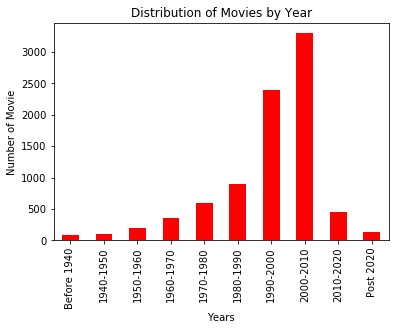

In [10]:
#GRAPH FOR DISTRIBUTION OF YEARS
#group by year group
yeargroup_df = year_data_df.groupby(['Year Group'])

ygcount_df = pd.DataFrame(yeargroup_df['year'].count())

#create bar chart
yeargroup_bar = ygcount_df.plot(kind="bar", title="Distribution of Movies by Year", color="red", legend=False)

#label the chart
yeargroup_bar.set_xlabel("Years")
yeargroup_bar.set_ylabel("Number of Movie")
plt.tight_layout

plt.show


In [11]:
#sort data by rating
topmovies_df = year_data_df.sort_values("rating", ascending=False)

topmovies_df.head()

,title,year,rating,vote,Year Group
3848,Dragon Family,2004.0,9.6,8.0,2000-2010
2021,Mortal Kombat: At The Movies,2012.0,9.5,6.0,2010-2020
7655,Band of Brothers,2001.0,9.4,398551.0,2000-2010
2906,The Sopranos: Season 6 Invitation to the Set,2005.0,9.4,47.0,2000-2010
1185,Widespread Panic: The Earth Will Swallow You,2002.0,9.3,13.0,2000-2010


<function matplotlib.pyplot.show>

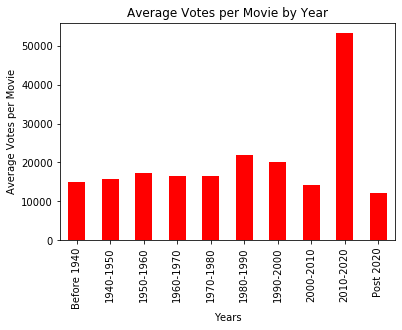

In [16]:
#GRAPH FOR AVERAGE VOTES PER MOVIE BY YEAR
topyear_df = topmovies_df.groupby(['Year Group'])

tycount_df = pd.DataFrame(topyear_df['vote'].mean())

#create bar chart
top25_bar = tycount_df.plot(kind="bar", title="Average Votes per Movie by Year", color="red", legend=False)

#label the chart
top25_bar.set_xlabel("Years")
top25_bar.set_ylabel("Average Votes per Movie")
plt.tight_layout

plt.show


In [13]:
top25_df = topmovies_df[:25]

top25_df

,title,year,rating,vote,Year Group
3848,Dragon Family,2004.0,9.6,8.0,2000-2010
2021,Mortal Kombat: At The Movies,2012.0,9.5,6.0,2010-2020
7655,Band of Brothers,2001.0,9.4,398551.0,2000-2010
2906,The Sopranos: Season 6 Invitation to the Set,2005.0,9.4,47.0,2000-2010
1185,Widespread Panic: The Earth Will Swallow You,2002.0,9.3,13.0,2000-2010
698,Yanni: Live at the Acropolis,1994.0,9.3,410.0,1990-2000
652,The Shawshank Redemption,1994.0,9.3,2461873.0,1990-2000
2807,Queensrÿche: Operation Livecrime,1991.0,9.3,146.0,1990-2000
282,Blue Planet II,2017.0,9.3,36474.0,2010-2020
2600,Pride 25: Body Blow,2003.0,9.3,8.0,2000-2010
